Predict rain tomorrow in Australia

In [1]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

In [2]:
df = pd.read_csv ("./data/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


COLUMN "RISK_MM" MUST BE DELETED

In [3]:
df = df.drop(['RISK_MM','Date'], axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [5]:
df.shape

(142193, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null obje

In [7]:
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [8]:
df = df.dropna(how='any')

df = pd.get_dummies(df, columns = ['Location','WindGustDir','WindDir9am', 'WindDir3pm' ])

df['RainToday'].replace({'No':0,'Yes':1},inplace=True)
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

df.dtypes


MinTemp                      float64
MaxTemp                      float64
Rainfall                     float64
Evaporation                  float64
Sunshine                     float64
WindGustSpeed                float64
WindSpeed9am                 float64
WindSpeed3pm                 float64
Humidity9am                  float64
Humidity3pm                  float64
Pressure9am                  float64
Pressure3pm                  float64
Cloud9am                     float64
Cloud3pm                     float64
Temp9am                      float64
Temp3pm                      float64
RainToday                      int64
RainTomorrow                   int64
Location_AliceSprings          uint8
Location_Brisbane              uint8
Location_Cairns                uint8
Location_Canberra              uint8
Location_Cobar                 uint8
Location_CoffsHarbour          uint8
Location_Darwin                uint8
Location_Hobart                uint8
Location_Melbourne             uint8
L

# Column "RainTomorrow" is our target

In [9]:
def test_model(model, X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=5)
    model.fit(X_train, Y_train)
    print(f"{type(model).__name__} -> {model.score(X_test, Y_test)}")


def test_classification(X, y):
    classifiers = [
        SGDClassifier(max_iter=100),
        Perceptron(random_state=5),
    ]
    for classifier in classifiers:
        test_model(classifier, X, y)

def test_regression(X, y):
    regressors = [
        LinearRegression(),
        RandomForestRegressor(n_estimators=10)
    ]
    for regressor in regressors:
        test_model(regressor, X, y)


In [10]:
test_regression(df.drop(['RainTomorrow'], axis=1), df['RainTomorrow'])
test_classification(df.drop(['RainTomorrow'], axis=1), df['RainTomorrow'])

LinearRegression -> 0.37157259275626886
RandomForestRegressor -> 0.3604170583896208


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier -> 0.8292067243138729
Perceptron -> 0.8510661152586068


In [11]:
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
5939,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,0,1,0,0,0
5940,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0,0,1,0,0,0,0,0
5942,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,1,0,0,0,0,0,0,0,0,0
5943,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,0,1
5944,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

t0 = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=5)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test, y_pred)

print('Accuracy :', score)
print('Time taken :', time.time()-t0)

Accuracy : 0.8212041463021644
Time taken : 2.1046040058135986


In [13]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

t0=time.time()

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)
clf_dt = DecisionTreeClassifier(random_state=5)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('Accuracy :', score)
print('Time taken :' , time.time()-t0)


Accuracy : 0.7953166120629465
Time taken : 1.2662949562072754


In [14]:
# #SUPPORT VECTOR
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# t0=time.time()
# # X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

# clf_svc = svm.SVC(kernel='linear')
# clf_svc.fit(X_train,y_train)
# y_pred = clf_svc.predict(X_test)
# score = accuracy_score(y_test,y_pred)
# print('Accuracy :', score)
# print('Time taken :' , time.time()-t0)

In [25]:
from sklearn import tree

perceptron = Perceptron()
perceptron = perceptron.fit(X_train, y_train)
perceptron.score(X_test, y_test)

0.8021913099521993

# Este modelo tiene la misma precision de predecir un uno o un cero (0,84), precison es que está muy seguro de que será 1 y de los 1 predichos, sólo ha acertado un 33% de ellos (que son con los que se queda porque están seguros de ellos, el 67% son dudosos)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, perceptron.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.81      0.86     14439
           1       0.54      0.76      0.63      4180

    accuracy                           0.80     18619
   macro avg       0.73      0.79      0.75     18619
weighted avg       0.84      0.80      0.81     18619



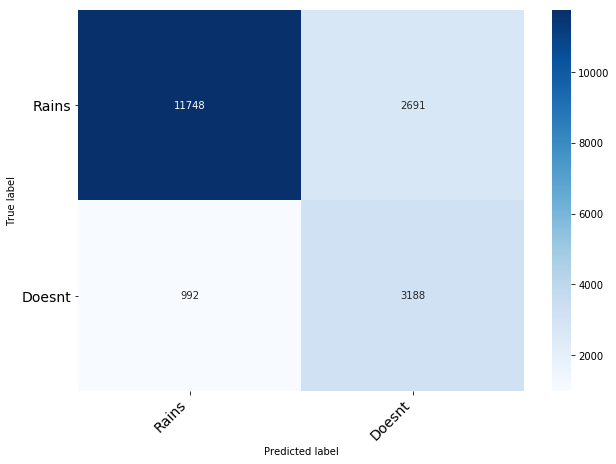

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="Blues")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, perceptron.predict(X_test))

print_confusion_matrix(conf, ['Rains', 'Doesnt'])